In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

# Getting data

In [82]:
nodes = pd.read_csv("../data/large_synthetic_fog_nodes.csv")
tasks = pd.read_csv("../data/large_synthetic_tasks.csv")

nodes.info()
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Node_ID                       500 non-null    object 
 1   Processing_Power_GHz          500 non-null    float64
 2   Available_Memory_GB           500 non-null    int64  
 3   Energy_Consumption_Rate_J_ms  500 non-null    float64
 4   Network_Latency_ms            500 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Task_ID                    11000 non-null  object 
 1   Task_Length_MIns           11000 non-null  int64  
 2   Arrival_Time_s             11000 non-null  int64  
 3   Deadline_s                 

In [83]:
nodes.head()

,Node_ID,Processing_Power_GHz,Available_Memory_GB,Energy_Consumption_Rate_J_ms,Network_Latency_ms
0,N1,3.228483,89,0.328811,28
1,N2,1.615700,71,0.553022,32
2,N3,2.020780,70,0.231735,23
3,N4,1.806147,15,0.543662,14
4,N5,1.590314,58,0.680510,38


In [84]:
tasks.head()

,Task_ID,Task_Length_MIns,Arrival_Time_s,Deadline_s,Required_Computation_MIPS,Task_Allocation,Execution_Delay_ms,Energy_Consumption_J
0,T1,8189,178,38,4620,Cloud,2895.685833,1703.730027
1,T2,2937,693,125,2225,Cloud,934.965670,243.805511
2,T3,1486,372,124,3954,Cloud,835.975051,376.888729
3,T4,4687,279,76,4455,Cloud,1617.295452,1090.691451
4,T5,1447,13,13,4776,Fog,425.592142,248.998343


In [85]:
mapping = {'Cloud': 0, 'Fog': 1}
tasks['Task_Allocation'] = tasks['Task_Allocation'].map(mapping)

In [86]:
print(len(tasks.Task_ID.unique()))
print(len(nodes.Node_ID.unique()))

tasks = tasks.drop(columns=['Task_ID'])
nodes = nodes.drop(columns=['Node_ID'])

11000
500


In [87]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Processing_Power_GHz          500 non-null    float64
 1   Available_Memory_GB           500 non-null    int64  
 2   Energy_Consumption_Rate_J_ms  500 non-null    float64
 3   Network_Latency_ms            500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [88]:
nodes.head(3)

,Processing_Power_GHz,Available_Memory_GB,Energy_Consumption_Rate_J_ms,Network_Latency_ms
0,3.228483,89,0.328811,28
1,1.615700,71,0.553022,32
2,2.020780,70,0.231735,23


In [89]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Task_Length_MIns           11000 non-null  int64  
 1   Arrival_Time_s             11000 non-null  int64  
 2   Deadline_s                 11000 non-null  int64  
 3   Required_Computation_MIPS  11000 non-null  int64  
 4   Task_Allocation            11000 non-null  int64  
 5   Execution_Delay_ms         11000 non-null  float64
 6   Energy_Consumption_J       11000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 601.7 KB


In [90]:
tasks.head(3)

,Task_Length_MIns,Arrival_Time_s,Deadline_s,Required_Computation_MIPS,Task_Allocation,Execution_Delay_ms,Energy_Consumption_J
0,8189,178,38,4620,0,2895.685833,1703.730027
1,2937,693,125,2225,0,934.965670,243.805511
2,1486,372,124,3954,0,835.975051,376.888729


# EDA

/tmp/ipykernel_190042/156597107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")


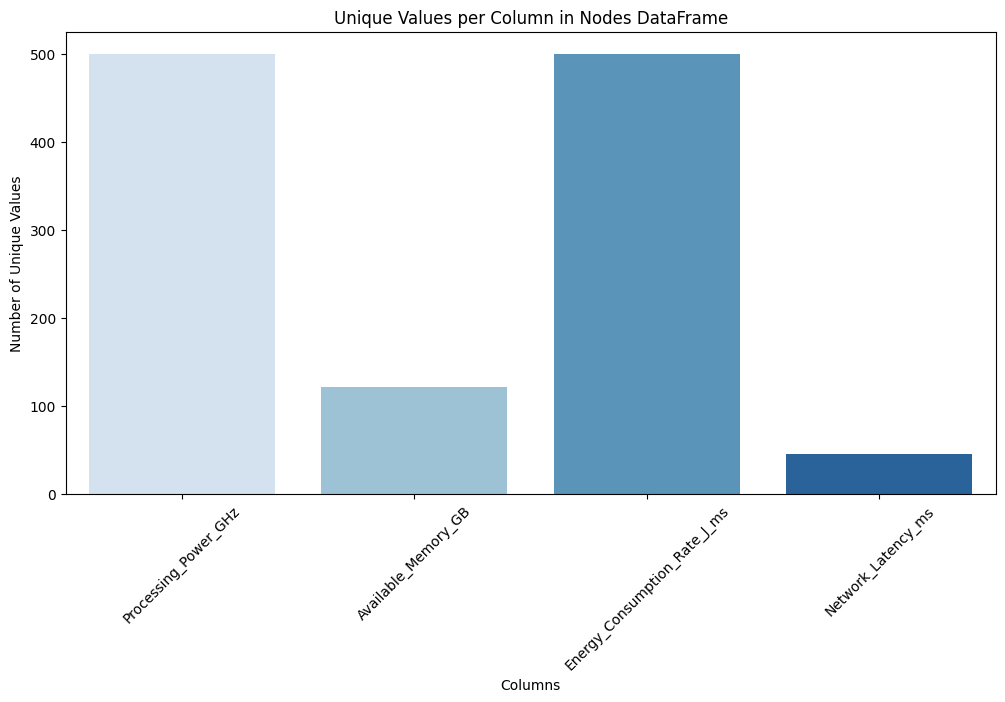

/tmp/ipykernel_190042/156597107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")


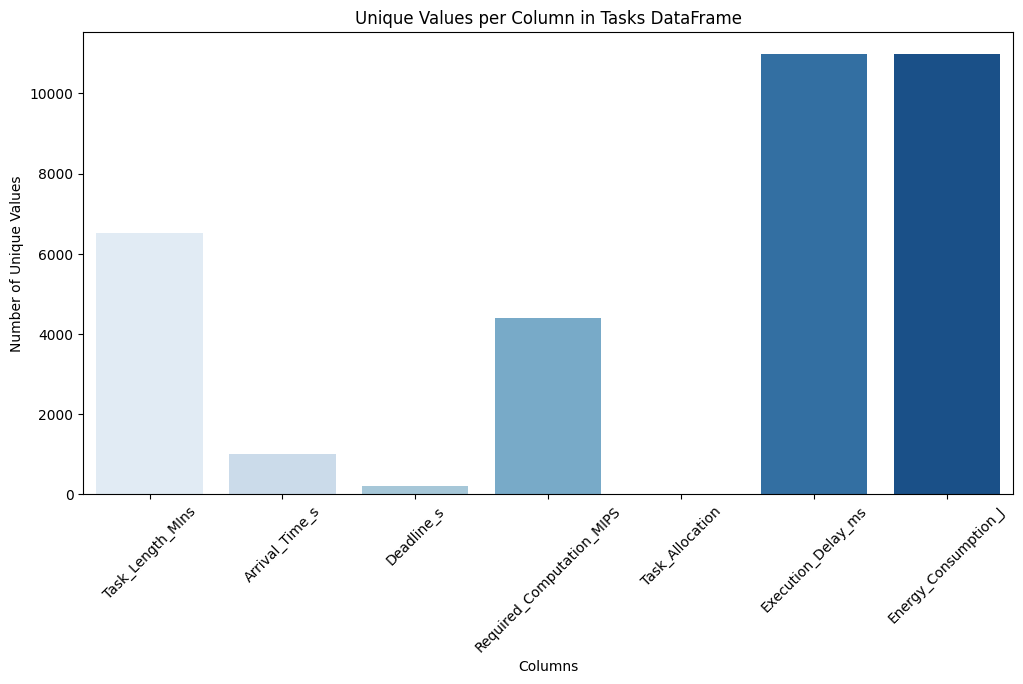

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count unique values in each column
def plot_unique_values(df, title):
    unique_counts = df.nunique()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")
    plt.xlabel("Columns")
    plt.ylabel("Number of Unique Values")
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.show()

# Plot for Nodes DataFrame
plot_unique_values(nodes, "Unique Values per Column in Nodes DataFrame")

# Plot for Tasks DataFrame
plot_unique_values(tasks, "Unique Values per Column in Tasks DataFrame")


### Pierson Correlations in Tasks

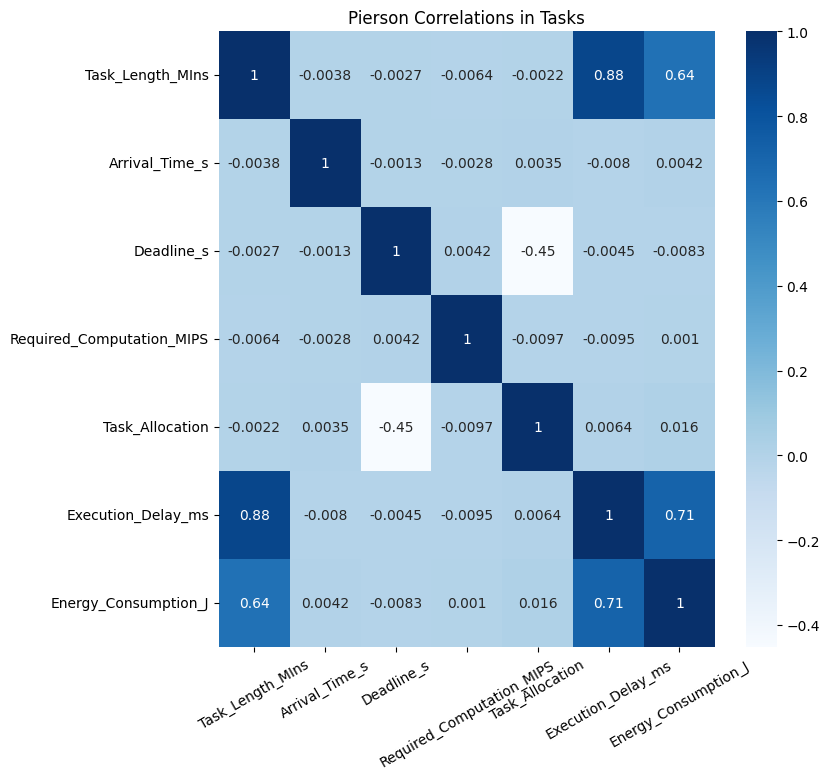

In [92]:
plt.figure(figsize=(8,8))
sns.heatmap(tasks.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Pierson Correlations in Tasks")
plt.xticks(rotation=30)
plt.show()

### Pierson Correlations in Nodes

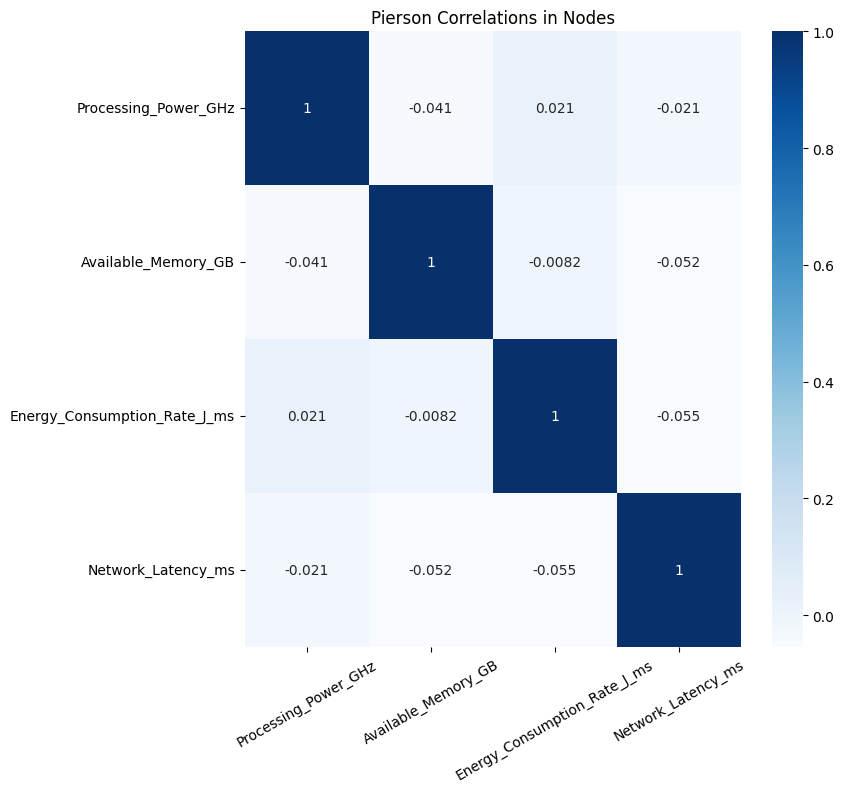

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(nodes.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Pierson Correlations in Nodes")
plt.xticks(rotation=30)
plt.show()

### Node Characteristics

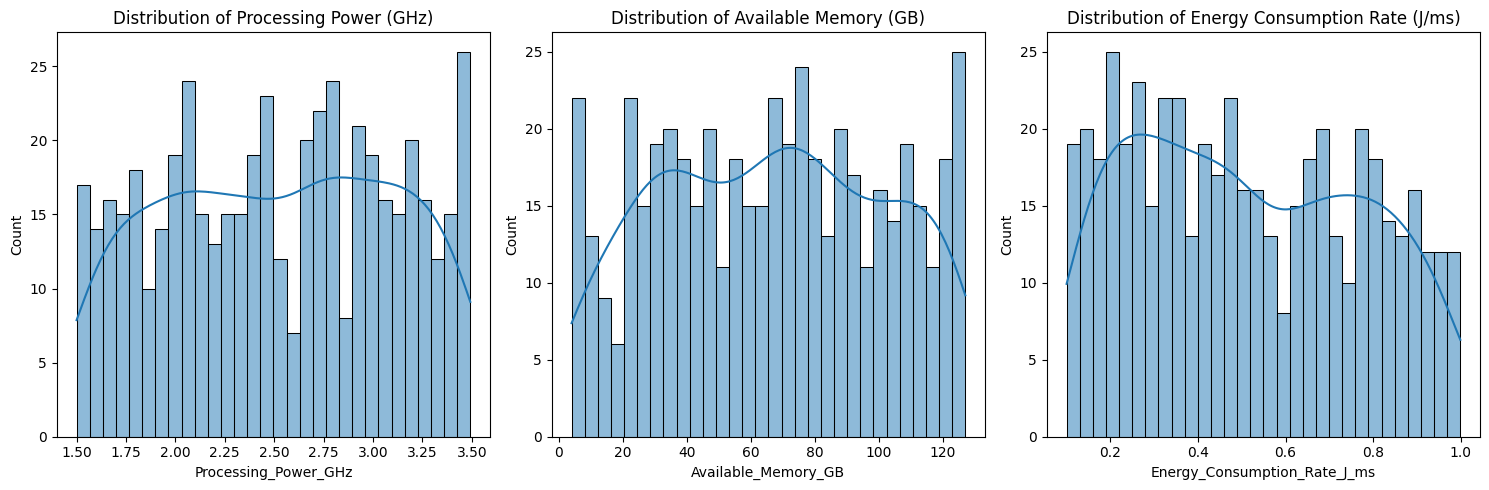

In [94]:
# Histograms for Fog Nodes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(nodes["Processing_Power_GHz"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Processing Power (GHz)")

sns.histplot(nodes["Available_Memory_GB"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Available Memory (GB)")

sns.histplot(nodes["Energy_Consumption_Rate_J_ms"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Energy Consumption Rate (J/ms)")

plt.tight_layout()
plt.show()


### Execution Delay

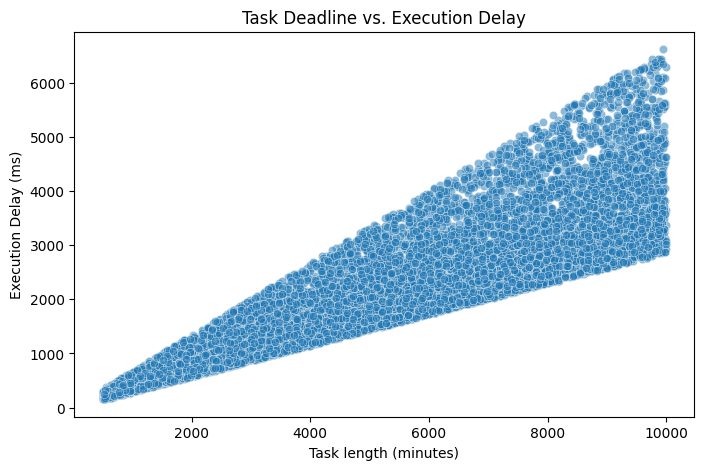

In [95]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tasks["Task_Length_MIns"], y=tasks["Execution_Delay_ms"], alpha=0.5)
plt.xlabel("Task length (minutes)")
plt.ylabel("Execution Delay (ms)")
plt.title("Task Deadline vs. Execution Delay")
plt.show()


### Task Characteristics

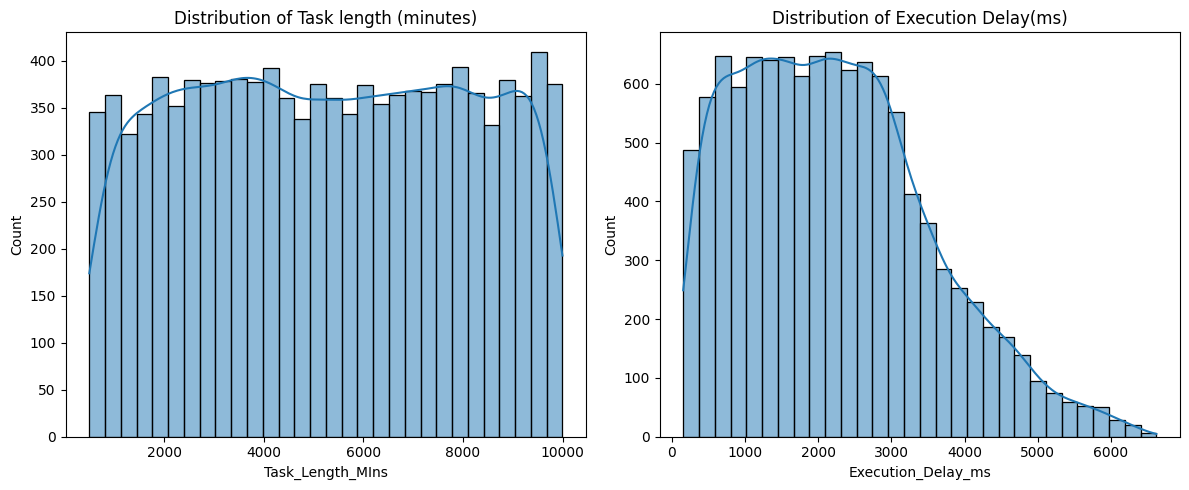

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(tasks["Task_Length_MIns"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Task length (minutes)")

sns.histplot(tasks["Execution_Delay_ms"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Execution Delay(ms)")

plt.tight_layout()
plt.show()



# Entries Similarity

In [97]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
X = nodes.values
Y = tasks.values

euclidean_distances = np.array([[euclidean(X[i], X[j]) 
                                 for j in range(len(X))] for i in range(len(X))])

np.fill_diagonal(euclidean_distances, np.inf)
similar_nodes_euclidean = np.unravel_index(np.argmin(euclidean_distances), euclidean_distances.shape)

cos_sim_matrix = cosine_similarity(Y)

np.fill_diagonal(cos_sim_matrix, -np.inf)  
similar_nodes_cosine = np.unravel_index(np.argmax(cos_sim_matrix), cos_sim_matrix.shape)


In [99]:
print(f"Most similar nodes (Euclidean):")
print(f"{nodes.iloc[similar_nodes_euclidean[0]]} \n\n {nodes.iloc[similar_nodes_euclidean[1]]}")

Most similar nodes (Euclidean):
Processing_Power_GHz             1.687314
Available_Memory_GB             30.000000
Energy_Consumption_Rate_J_ms     0.705200
Network_Latency_ms              49.000000
Name: 110, dtype: float64 

 Processing_Power_GHz             1.650050
Available_Memory_GB             30.000000
Energy_Consumption_Rate_J_ms     0.773019
Network_Latency_ms              49.000000
Name: 265, dtype: float64


In [100]:
print(f"\n\nMost similar nodes (Cosine): {similar_nodes_cosine}")
print(f"{tasks.iloc[similar_nodes_cosine[0]]} \n\n {tasks.iloc[similar_nodes_cosine[1]]}")



Most similar nodes (Cosine): (np.int64(5961), np.int64(9969))
Task_Length_MIns             8598.000000
Arrival_Time_s                508.000000
Deadline_s                    140.000000
Required_Computation_MIPS    2394.000000
Task_Allocation                 0.000000
Execution_Delay_ms           4760.408862
Energy_Consumption_J         2588.055615
Name: 5961, dtype: float64 

 Task_Length_MIns             7571.000000
Arrival_Time_s                451.000000
Deadline_s                    130.000000
Required_Computation_MIPS    2102.000000
Task_Allocation                 0.000000
Execution_Delay_ms           4191.795242
Energy_Consumption_J         2278.921733
Name: 9969, dtype: float64


# Multidimentional Visualisations

## 3D Scatter Plot

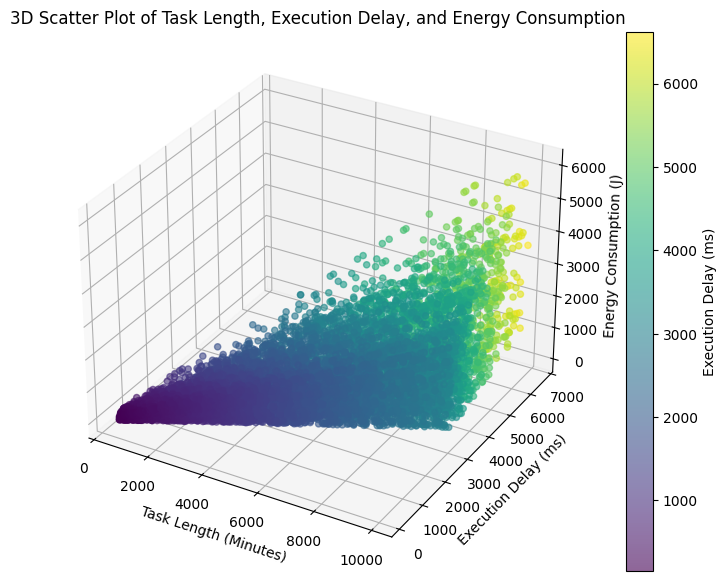

In [101]:
# Creating the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

task_len = tasks.Task_Length_MIns
exec_delay = tasks.Execution_Delay_ms
energy_con = tasks.Energy_Consumption_J

sc = ax.scatter(task_len, exec_delay, energy_con, c=tasks.Execution_Delay_ms, cmap='viridis', alpha=0.6)

# Labels and title
ax.set_xlabel("Task Length (Minutes)")
ax.set_ylabel("Execution Delay (ms)")
ax.set_zlabel("Energy Consumption (J)")
ax.set_title("3D Scatter Plot of Task Length, Execution Delay, and Energy Consumption")

# Colorbar
plt.colorbar(sc, label="Execution Delay (ms)")

plt.show()

In [102]:
nodes.columns

Index(['Processing_Power_GHz', 'Available_Memory_GB',
       'Energy_Consumption_Rate_J_ms', 'Network_Latency_ms'],
      dtype='object')

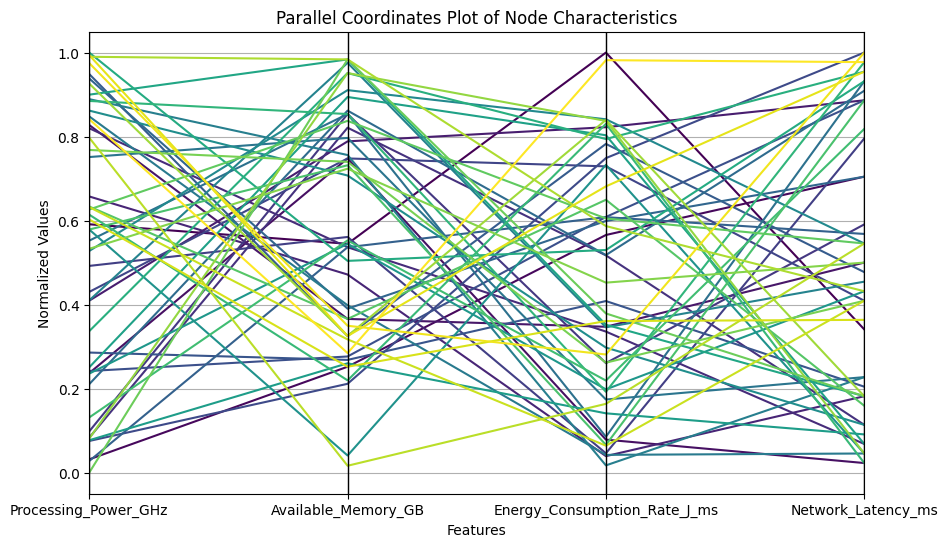

In [103]:
# Normalize data for parallel coordinates (scaling between 0 and 1)
normalized_data = nodes.sample(50).copy()
for col in ["Processing_Power_GHz", "Available_Memory_GB", "Energy_Consumption_Rate_J_ms", "Network_Latency_ms"]:
    normalized_data[col] = (nodes[col] - nodes[col].min()) / (nodes[col].max() - nodes[col].min())


# Plotting Parallel Coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(normalized_data, class_column="Processing_Power_GHz", cols=["Processing_Power_GHz", "Available_Memory_GB", "Energy_Consumption_Rate_J_ms", "Network_Latency_ms"], color=plt.cm.viridis(np.linspace(0, 1, len(normalized_data))))

# Customizing the plot
plt.title("Parallel Coordinates Plot of Node Characteristics")
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.grid(True)
plt.legend().remove()
plt.show()

## Misleading Visualisations

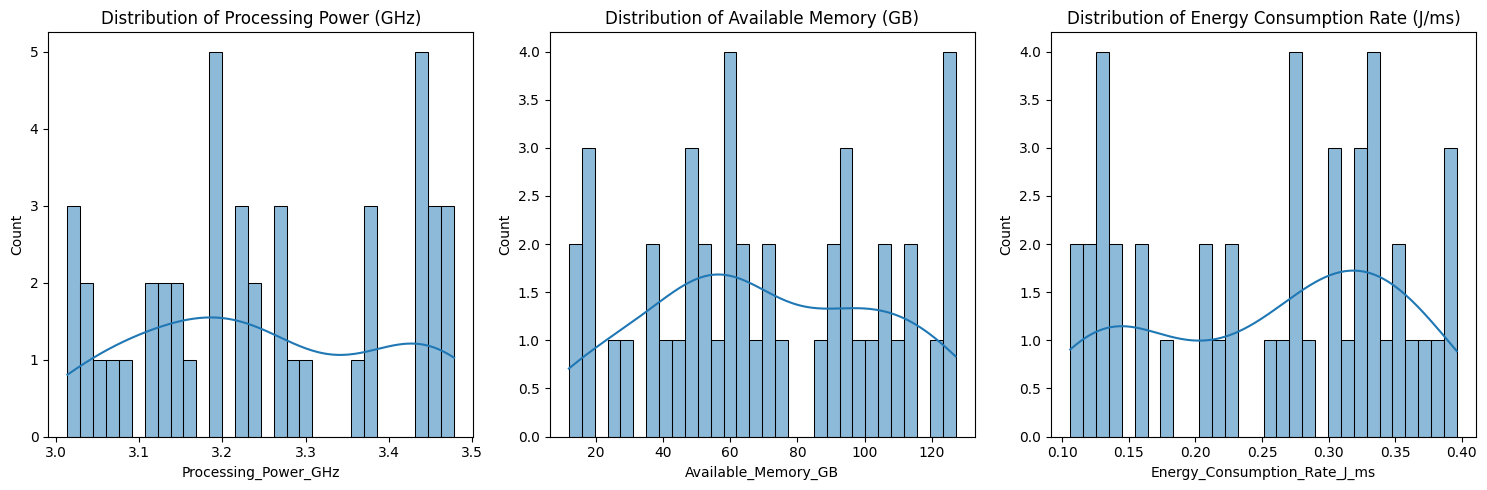

In [104]:
fake_nodes = nodes[
    (nodes["Processing_Power_GHz"] > 3) &
    (nodes["Available_Memory_GB"] > 10) &
    (nodes["Energy_Consumption_Rate_J_ms"] < 0.4)
]

# Histograms for Fog Nodes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(fake_nodes["Processing_Power_GHz"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Processing Power (GHz)")

sns.histplot(fake_nodes["Available_Memory_GB"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Available Memory (GB)")

sns.histplot(fake_nodes["Energy_Consumption_Rate_J_ms"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Energy Consumption Rate (J/ms)")

plt.tight_layout()
plt.show()


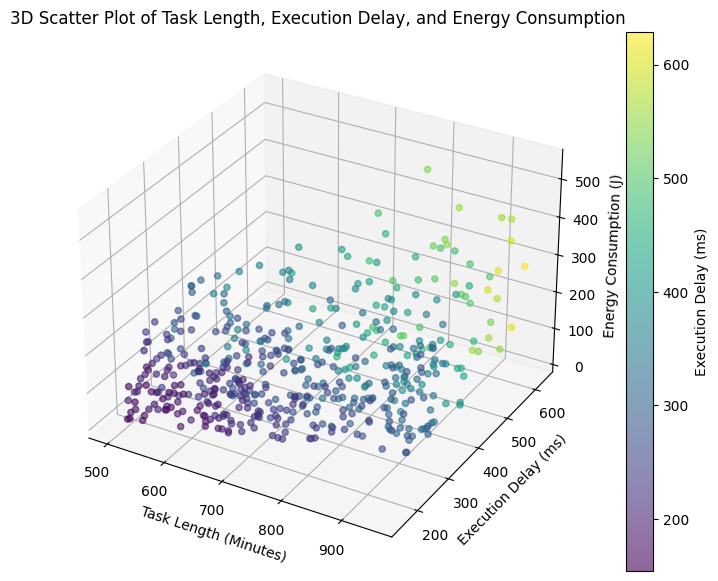

In [105]:
fake_tasks = tasks.copy().sort_values('Task_Length_MIns')[0:500]

# Creating the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

task_len = fake_tasks.Task_Length_MIns
exec_delay = fake_tasks.Execution_Delay_ms
energy_con = fake_tasks.Energy_Consumption_J

sc = ax.scatter(task_len, exec_delay, energy_con, c=fake_tasks.Execution_Delay_ms, cmap='viridis', alpha=0.6)

# Labels and title
ax.set_xlabel("Task Length (Minutes)")
ax.set_ylabel("Execution Delay (ms)")
ax.set_zlabel("Energy Consumption (J)")
ax.set_title("3D Scatter Plot of Task Length, Execution Delay, and Energy Consumption")

# Colorbar
plt.colorbar(sc, label="Execution Delay (ms)")

plt.show()

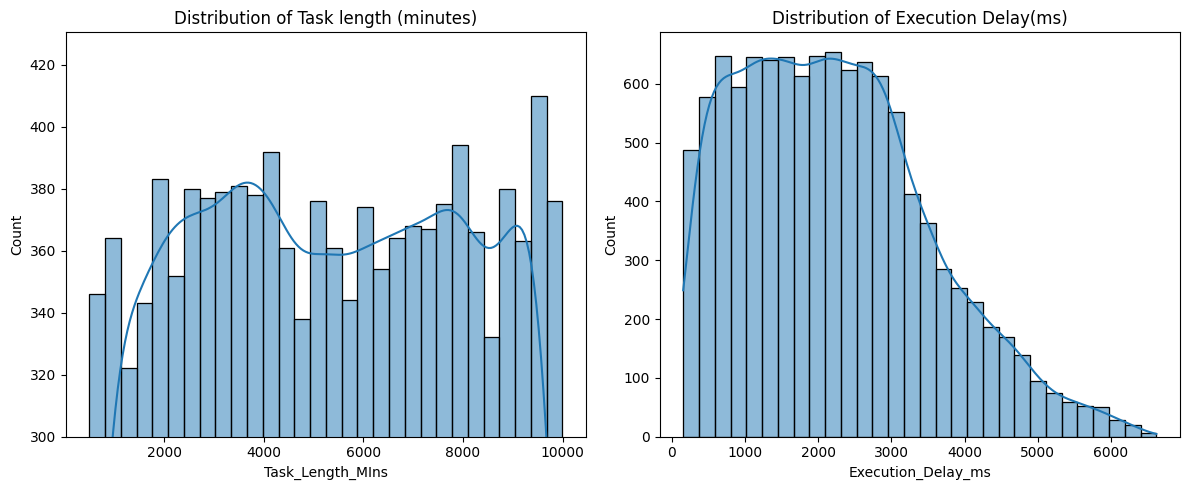

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(tasks["Task_Length_MIns"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Task length (minutes)")
axes[0].set_ylim(300, None) 

sns.histplot(tasks["Execution_Delay_ms"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Execution Delay(ms)")

plt.tight_layout()
plt.show()

